В данном наборе данных используется шкала Буш-Фрэнсис для кататонии [(Bush-Francis Catatonia Rating Scale - BFCRS)](https://www.urmc.rochester.edu/MediaLibraries/URMCMedia/psychiatry/about/docs/BFCRS-with-Manual-links.pdf).  
Структура:  
1. Excitement - Возбуждение	
2. Immobility/Stupor - Ступор
3. Mutism - Мутизм
4. Staring - Фиксирование взгляда
5. Posturing/Catalepsy - Нарушение походки
6. Grimacing - Гримасы	
7. Echopraxia/Echolalia - Эхопраксия / эхолалия 
8. Stereotypy - Стереотипии
9. Mannerisms - Манерность
10. Verbigeration - Вербигерации
11. Rigidity - Ригидность 
12. Negativism - Негативизм
13. Waxy Flexibility - Восковая гибкость
14. Withdrawal - Уход в себя 
15. Impulsivity - Импульсивность 
16. Automatic Obedience - Автоматическое подчнение
17. Mitgehen - Mitgehen (Следование воздействию вопреки инструкциям)
18. Gegenhalten - Сопротивление пассивному движению
19. Ambitendency - Амбитендентность
20. Grasp Reflex - хватательный рефлекс
21. Perseveration - Персеверации
22. Combativeness - Агрессивность	
23. Autonomic Abnormality - Сбои температуры/ давления и пр.

Оценка от 0 до 3 для каждого симптома  
    0 = отсутствует  
    1 = легкая выраженность  
    2 = умеренная выраженность  
    3 = тяжелая выраженность  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Предварительно пришлось очистиить оригинальные данные, убрать лишние строки после 813

In [2]:
df = pd.read_excel('.\\data\\кататония 13.06.2025.xlsx', header=0, skiprows=[0])
df.info(verbose=True, show_counts=True) # Просмотр типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 166 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    ВозрастОбсл                              811 non-null    float64
 1    Пол                                      813 non-null    object 
 2    неполнсред                               813 non-null    int64  
 3    среднее                                  813 non-null    int64  
 4    срспец                                   813 non-null    int64  
 5    неоквысш                                 813 non-null    int64  
 6    высш                                     813 non-null    int64  
 7    два и более высших                       813 non-null    int64  
 8    учащийся                                 813 non-null    int64  
 9    безработный                              813 non-null    int64  
 10   работает                            

Вывод уникальных значений столбцов и строк, в которых встречаются null значения

In [3]:
null_mas = []
for i in df.columns:
    print(i)
    for j in df[i][df[i].isna()].index:
        if not j in null_mas:
            null_mas.append(j)
    print(df[i][df[i].isna()].index)
    print(df[i].unique(), end = '\n\n')


ВозрастОбсл
Index([150, 597], dtype='int64')
[33. 47. 27. 19. 24. 34. 53. 52. 32. 22. 18. 68. 30. 42. 31. 23. 57. 25.
 28. 29. 36. 38. 56. 20. 43. 65. 55. 49. 41. 21. 60. 40. 35. 26. 61. 62.
 37. 58. nan 39. 44. 71. 81. 54. 48. 50. 72. 67. 63. 78. 45. 76. 64. 83.
 77.  0. 46. 51. 70. 80. 66. 69. 74.]

Пол
Index([], dtype='int64')
['Мужской' 'Женский']

неполнсред
Index([], dtype='int64')
[0 1]

среднее
Index([], dtype='int64')
[1 0]

срспец
Index([], dtype='int64')
[0 1]

неоквысш
Index([], dtype='int64')
[0 1]

высш
Index([], dtype='int64')
[0 1]

два и более высших
Index([], dtype='int64')
[0 1]

учащийся
Index([], dtype='int64')
[0 1]

безработный
Index([], dtype='int64')
[1 0]

работает
Index([], dtype='int64')
[0 1]

пенсионер
Index([], dtype='int64')
[0 1]

СемПол
Index([], dtype='int64')
['Никогда не состоял(а) в браке'
 'В наст.время в разводе, живут раздельно (указать количество браков)'
 'Официальный брак'
 'В наст.время в разводе, живут вместе (указать количество браков)'
 '

In [4]:
null_mas # Строки с нулевыми значениями. 

[150, 597, 479, 78, 807, 549]

Ввиду небольшого объема данных и малого количества данных с null, решено подставить моду вместо null значений

In [5]:
df_filled = df.copy()

# Заменяем пустые значения модой
for i in null_mas:
    for j in df.iloc[i][df.iloc[i].isna()].index:
        df_filled.loc[df_filled.index[i], j] = df[j].mode().values[0]

# Заменяем текстовый пол на бинарные значения
df_filled['Пол'] = df_filled['Пол'].apply(lambda x: 0 if x=='Мужской' else 1)


# Заменяем текстовый семейный статус при помощи one-hot encoding
# Создаем числовые категории с логической группировкой
# family_status_map = {
#     'Никогда не состоял(а) в браке': 0,
#     'В наст.время в разводе, живут раздельно (указать количество браков)': 1,
#     'В наст.время в разводе, живут вместе (указать количество браков)': 1,
#     'Официальный брак': 2,
#     'Неофициальный брак': 3,
#     'Вдова/вдовец': 4
# }

# df_filled['СемПол_код'] = df_filled['СемПол'].map(family_status_map)
# # Создаем бинарные признаки из кода
# status_dummies = pd.get_dummies(df_filled['СемПол_код'], prefix='СемПол')
# df_filled = pd.concat([df_filled, status_dummies], axis=1)
# df_filled = df_filled.drop(['СемПол', 'СемПол_код'], axis=1)

# child_relat_map = {
#     'Отношения с детьми конфликтные' : 0,
#     'Отношений с детьми не поддерживает' : 1,
#     'Поддерживает отношения с детьми, но не участвует в их жизни' : 2,
#     'Активно поддерживает отношения с детьми, проявляет интерес и заботу' : 3
# }
# df_filled['ОтнДети'] = df_filled['ОтнДети'].map(child_relat_map)

for i in df_filled.columns:
    if len(df_filled[i].unique()) == 2:
        df_filled[i] = df_filled[i].apply(lambda x: True if x==1 else False)
df_filled.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 166 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    ВозрастОбсл                              813 non-null    float64
 1    Пол                                      813 non-null    bool   
 2    неполнсред                               813 non-null    bool   
 3    среднее                                  813 non-null    bool   
 4    срспец                                   813 non-null    bool   
 5    неоквысш                                 813 non-null    bool   
 6    высш                                     813 non-null    bool   
 7    два и более высших                       813 non-null    bool   
 8    учащийся                                 813 non-null    bool   
 9    безработный                              813 non-null    bool   
 10   работает                            

В виду сложностей с балансировкой большого количества one-hot encoded данных, было решено разделить данные на train и test без их использования, и уже затем при помощи FrequencyEncoder преобразовать оставшиеся столбцы. Это оставит прежним количество столбцов, не разредт данные и снимет необходимость глубоко погружаться в связи между данными и целевым показателем 

In [6]:
non_object_columns = df_filled.select_dtypes(exclude=['object']).columns.tolist()
print("Все не-object колонки:", non_object_columns)
non_object_columns = non_object_columns[:-1]
numeric_features = df_filled.select_dtypes(include=['float64', 'int64']).columns.tolist()
binary_features = df_filled.select_dtypes(include=['bool']).columns.tolist()

Все не-object колонки: ['ВозрастОбсл', 'Пол', 'неполнсред', 'среднее', 'срспец', 'неоквысш', 'высш', 'два и более высших', 'учащийся', 'безработный', 'работает', 'пенсионер', 'КолОфБрак', 'КолДети', 'гармоничные', 'симбиотические', 'зависимые', 'конфликтные', 'Наследственность_ДиагнозНеИзвестен', 'РЛ', 'Завершенный_суицид', 'Суицидальные_попытки', 'Шизофрения_мать', 'Шизофрения_отец', 'Шизофрения_дети', 'Шизофрения_сибл', 'Аффективные_расстройства_мать', 'ОргПорЦНС_мать', 'Хим_зависимость_мать', 'Аффективные_расстройства_отец', 'ОргПорЦНС_отец', 'Хим_зависимость_отец', 'Токсикоз первой половины беременности', 'Токсикоз второй половины беременности', 'Психотравмирующие события', 'Невынашивание в прошлом', 'Инфекционные заболевания', 'ПатРодовДруг', 'задержка развития', 'вредная среда (инфекции, травмы головы)', 'энурез энкопрез', 'логоневроз', 'привязанность', 'фобии', 'снохожждения, парейдолии', 'СДВГ', 'РАС', 'задержка', 'опережение', 'соматические', 'ЧМТ', 'обращаемость', 'задержка.1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

def perform_clustering_analysis(df, cols, col_y, n_clusters=None):
    """
    Полный анализ кластеризации с визуализацией
    
    Parameters:
    df - исходный DataFrame
    cols - список колонок для кластеризации
    col_y - целевая переменная для анализа
    n_clusters - количество кластеров (если None, определяется автоматически)
    """
    
    # 1. Подготовка данных
    print("1. Подготовка данных...")
    X = df[cols].copy()
    
    # Обработка пропущенных значений
    if X.isna().any().any():
        print(f"   Заполняем {X.isna().sum().sum()} пропущенных значений")
        X = X.fillna(X.mean())
    
    # 2. Масштабирование признаков
    print("2. Масштабирование признаков...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Определение оптимального числа кластеров (если не задано)
    if n_clusters is None:
        print("3. Определение оптимального числа кластеров...")
        n_clusters = find_optimal_clusters(X_scaled)
    
    print(f"   Используем {n_clusters} кластеров")
    
    # 4. Кластеризация K-means
    print("4. Выполнение кластеризации...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    # 5. Добавляем кластеры в DataFrame
    df_clustered = df.copy()
    df_clustered['cluster'] = clusters
    
    # 6. Анализ кластеров по целевой переменной
    print("5. Анализ кластеров...")
    cluster_stats = df_clustered.groupby('cluster')[col_y].agg(['mean', 'std', 'count'])
    print("\nСтатистика по кластерам для", col_y)
    print(cluster_stats)
    
    # 7. Уменьшение размерности для визуализации
    print("6. Уменьшение размерности...")
    X_reduced = reduce_dimensionality(X_scaled)
    
    # 8. Визуализация
    print("7. Визуализация результатов...")
    plot_clustering_results(X_reduced, clusters, df_clustered[col_y], cluster_stats)
    
    # 9. Оценка качества кластеризации
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"\n8. Качество кластеризации:")
    print(f"   Silhouette Score: {silhouette_avg:.3f}")
    
    return df_clustered, kmeans, cluster_stats

def find_optimal_clusters(X_scaled, max_k=10):
    """Определение оптимального числа кластеров методом локтя"""
    inertias = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Поиск "локтя" на графике
    differences = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
    optimal_k = differences.index(max(differences)) + 2
    
    # Визуализация метода локтя
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Оптимальное k = {optimal_k}')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Inertia')
    plt.title('Метод локтя для определения оптимального числа кластеров')
    plt.legend()
    plt.show()
    
    return optimal_k

def reduce_dimensionality(X_scaled):
    """Уменьшение размерности с использованием PCA и t-SNE"""
    # PCA для 2 компонент
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"   Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.3f}")
    
    return X_pca

def plot_clustering_results(X_reduced, clusters, target_values, cluster_stats):
    """Визуализация результатов кластеризации с правильным colorbar"""
    import matplotlib.colors as mcolors
    from matplotlib.colors import ListedColormap
    
    n_clusters = len(np.unique(clusters))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Визуализация кластеров с правильным colorbar
    # Создаем кастомную цветовую карту
    colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
    custom_cmap = ListedColormap(colors)
    
    scatter1 = axes[0, 0].scatter(X_reduced[:, 0], X_reduced[:, 1], 
                                 c=clusters, cmap=custom_cmap, alpha=0.7)
    cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
    cbar1.set_ticks(range(n_clusters))
    cbar1.set_ticklabels([f'Кластер {i}' for i in range(n_clusters)])
    axes[0, 0].set_title('Кластеризация данных')
    axes[0, 0].set_xlabel('Component 1')
    axes[0, 0].set_ylabel('Component 2')
    
    # 2. Визуализация по целевой переменной
    scatter2 = axes[0, 1].scatter(X_reduced[:, 0], X_reduced[:, 1], 
                                 c=target_values, cmap='viridis', alpha=0.7)
    cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
    cbar2.set_label(target_values.name)
    axes[0, 1].set_title(f'Распределение {target_values.name}')
    axes[0, 1].set_xlabel('Component 1')
    axes[0, 1].set_ylabel('Component 2')
    
    # 3. Средние значения по кластерам
    cluster_stats['mean'].plot(kind='bar', ax=axes[1, 0], color=colors)
    axes[1, 0].set_title(f'Среднее значение {target_values.name} по кластерам')
    axes[1, 0].set_xlabel('Кластер')
    axes[1, 0].set_ylabel(f'Среднее {target_values.name}')
    
    # 4. Размеры кластеров
    axes[1, 1].pie(cluster_stats['count'], labels=[f'Кластер {i}' for i in range(n_clusters)],
                   autopct='%1.1f%%', colors=colors)
    axes[1, 1].set_title('Размеры кластеров')
    
    plt.tight_layout()
    plt.show()


1. Подготовка данных...
2. Масштабирование признаков...
   Используем 4 кластеров
4. Выполнение кластеризации...
5. Анализ кластеров...

Статистика по кластерам для Шкала
              mean        std  count
cluster                             
0         7.891892   5.316556     37
1        10.319648   9.763100    341
2        12.983871  11.978574    186
3         9.927711   7.702298    249
6. Уменьшение размерности...
   Объясненная дисперсия PCA: 0.135
7. Визуализация результатов...


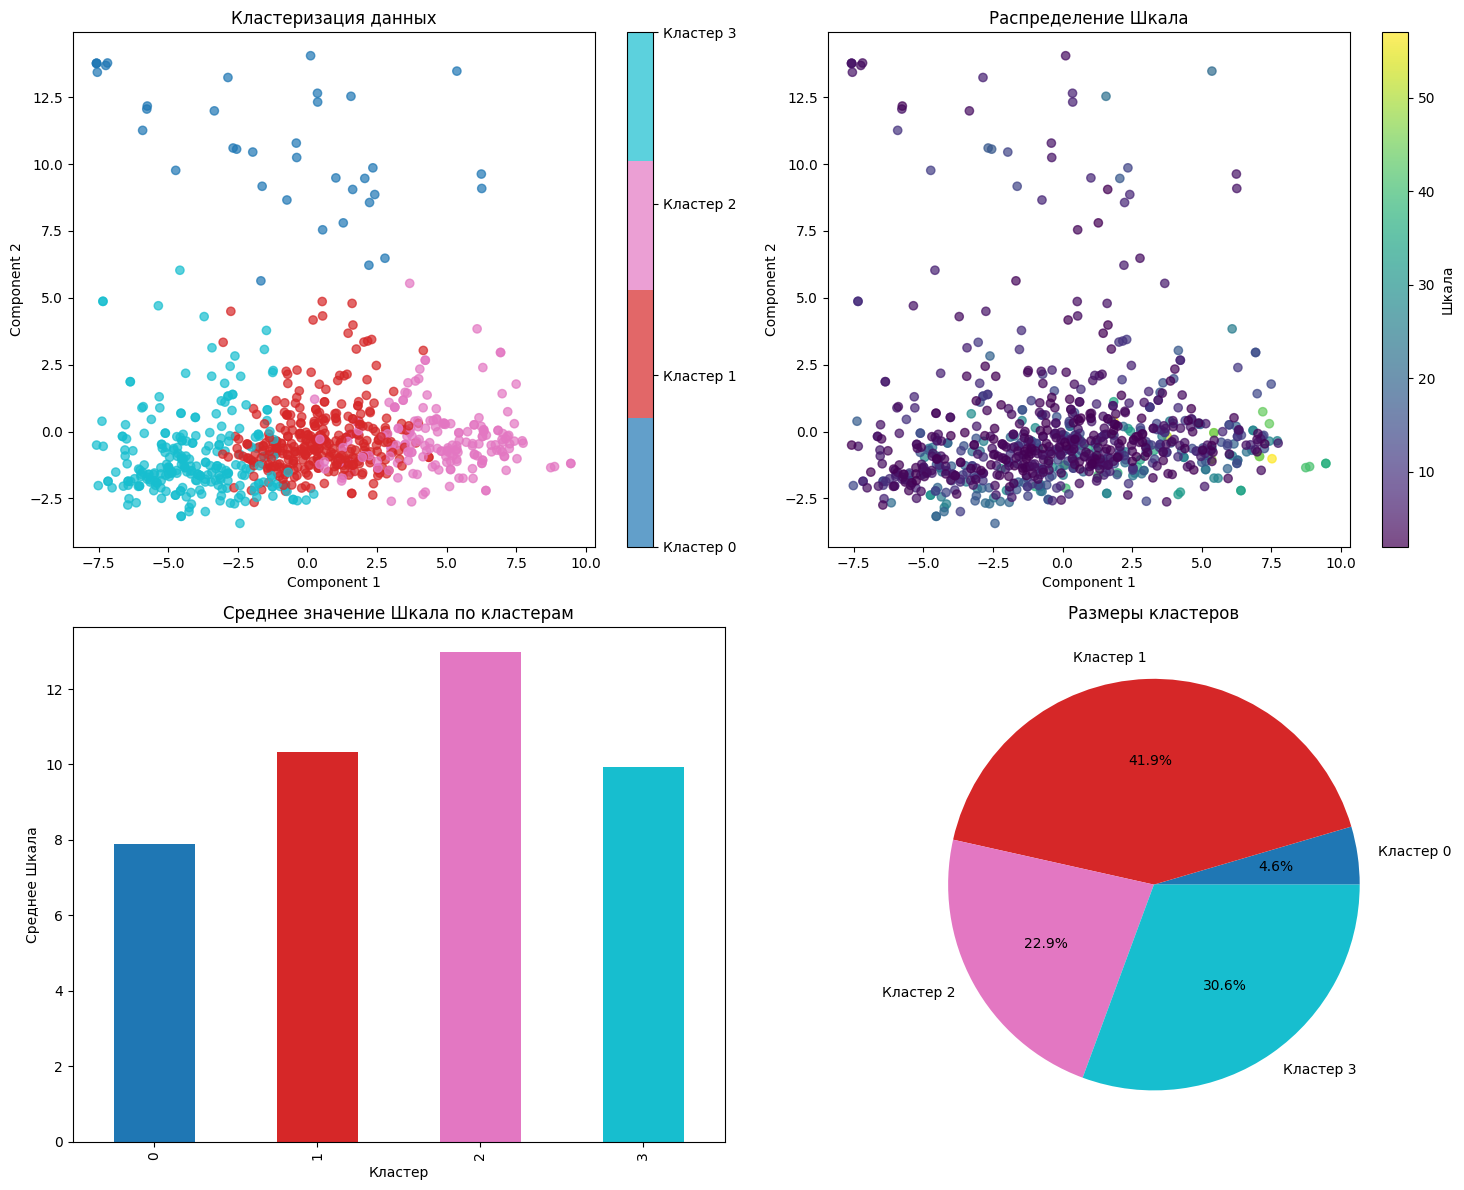


8. Качество кластеризации:
   Silhouette Score: 0.049

ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:

Кластер 0:
  Размер: 37 объектов
  Среднее Шкала: 7.89
  Стандартное отклонение: 5.32

Кластер 1:
  Размер: 341 объектов
  Среднее Шкала: 10.32
  Стандартное отклонение: 9.76

Кластер 2:
  Размер: 186 объектов
  Среднее Шкала: 12.98
  Стандартное отклонение: 11.98

Кластер 3:
  Размер: 249 объектов
  Среднее Шкала: 9.93
  Стандартное отклонение: 7.70


In [8]:
col_y = "Шкала"
df_clustered, model, stats = perform_clustering_analysis(
    df=df_filled,
    cols=non_object_columns,  # ваши колонки для кластеризации
    col_y=col_y,  # колонка для анализа средних значений
    n_clusters=4  # можно не указывать для автоматического определения
)

# Дополнительный анализ характеристик кластеров
print("\n" + "="*50)
print("ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:")
print("="*50)

for cluster_num in range(stats.shape[0]):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_num]
    print(f"\nКластер {cluster_num}:")
    print(f"  Размер: {len(cluster_data)} объектов")
    print(f"  Среднее {col_y}: {cluster_data[col_y].mean():.2f}")
    print(f"  Стандартное отклонение: {cluster_data[col_y].std():.2f}")

In [9]:
df_filled['cluster'] = df_clustered['cluster']

C:\Users\leous\AppData\Local\Temp\ipykernel_19420\3725502110.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filled['cluster'] = df_clustered['cluster']


In [10]:
from sklearn.model_selection import train_test_split

X = df_filled.index.values
y = df_filled['cluster'].values

train_indices, test_indices = train_test_split(
    X, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # стратификация по кластерам
)

print(f"Train size: {len(train_indices)}")
print(f"Test size: {len(test_indices)}")

Train size: 650
Test size: 163


In [11]:
def check_cluster_distribution(df, train_indices, test_indices, col):
    """Проверяет распределение кластеров в train и test"""
    
    train_clusters = df.loc[train_indices, col].value_counts(normalize=True).sort_index()
    test_clusters = df.loc[test_indices, col].value_counts(normalize=True).sort_index()
    original_clusters = df[col].value_counts(normalize=True).sort_index()
    
    distribution_df = pd.DataFrame({
        'Original': original_clusters,
        'Train': train_clusters,
        'Test': test_clusters
    })
    
    return distribution_df

# Проверяем распределение
distribution = check_cluster_distribution(df_filled, train_indices, test_indices, 'cluster')
print(distribution, end="\n\n")
distribution = check_cluster_distribution(df_filled, train_indices, test_indices, 'Пол')
print(distribution, end="\n\n")

         Original     Train      Test
cluster                              
0        0.045510  0.044615  0.049080
1        0.419434  0.420000  0.417178
2        0.228782  0.229231  0.226994
3        0.306273  0.306154  0.306748

       Original     Train      Test
Пол                                
False  0.510455  0.507692  0.521472
True   0.489545  0.492308  0.478528



In [12]:
df_filled, train_indices, test_indices
mean_mas = [df_filled.loc[train_indices]['Шкала'].mean(), df_filled.loc[test_indices]['Шкала'].mean(), df_filled['Шкала'].mean()]
std_mas = [df_filled.loc[train_indices]['Шкала'].std(), df_filled.loc[test_indices]['Шкала'].std(), df_filled['Шкала'].std()]

print("          mean           std")
print("Train    ", round(mean_mas[0], 3),'\t', round(std_mas[0], 3))
print("Test     ", round(mean_mas[1], 3),'\t', round(std_mas[1], 3))
print("Original ", round(mean_mas[2], 3),'\t', round(std_mas[2], 3))

          mean           std
Train     10.743 	 9.645
Test      10.521 	 9.865
Original  10.699 	 9.684


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """
    Частотное кодирование для категориальных переменных
    Заменяет категории на частоту их встречаемости в train данных
    """
    
    def __init__(self, columns=None, handle_unknown='zero'):
        """
        Parameters:
        columns: список колонок для кодирования (None - все object колонки)
        handle_unknown: как обрабатывать неизвестные категории в test 
                       'zero' - заменить на 0, 'nan' - заменить на NaN
        """
        self.columns = columns
        self.handle_unknown = handle_unknown
        self.frequency_maps = {}
        self.columns_to_encode = []
        
    def fit(self, X, y=None):
        """Обучаем преобразователь на train данных"""
        
        # Определяем колонки для кодирования
        if self.columns is None:
            self.columns_to_encode = X.select_dtypes(include=['object']).columns.tolist()
        else:
            self.columns_to_encode = self.columns
        
        # Создаем частотные словари для каждой колонки
        for col in self.columns_to_encode:
            freq_map = X[col].value_counts(normalize=True).to_dict()
            self.frequency_maps[col] = freq_map
            
        return self
    
    def transform(self, X):
        """Применяем преобразование"""
        
        X_transformed = X.copy()
        
        for col in self.columns_to_encode:
            if col in X_transformed.columns:
                if col in self.frequency_maps:
                    # Заменяем категории на частоты из train
                    freq_map = self.frequency_maps[col]
                    
                    # Для неизвестных категорий в test данных
                    if self.handle_unknown == 'zero':
                        X_transformed[col] = X_transformed[col].map(freq_map).fillna(0)
                    elif self.handle_unknown == 'nan':
                        X_transformed[col] = X_transformed[col].map(freq_map)
                    elif self.handle_unknown == 'mean':
                        mean_freq = np.mean(list(freq_map.values()))
                        X_transformed[col] = X_transformed[col].map(freq_map).fillna(mean_freq)
                else:
                    raise ValueError(f"Column {col} was not seen during fit")
        
        return X_transformed
    
    def fit_transform(self, X, y=None):
        """Fit и transform вместе"""
        return self.fit(X, y).transform(X)

In [14]:

df_filled_nocluster = df_filled.drop('cluster', axis=1).copy()

# Создаем и обучаем преобразователь на train данных
frequency_encoder = FrequencyEncoder(handle_unknown='zero')
X_train_encoded = frequency_encoder.fit_transform(df_filled_nocluster.loc[train_indices])

# Применяем к test данным
X_test_encoded = frequency_encoder.transform(df_filled_nocluster.loc[test_indices])


Финальное преобразование данных до вида, в котором их можно будет обрабаотывать в модели

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Разделение на бинарные и числовые признаки

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('bin', 'passthrough', binary_features)
    ],
    verbose_feature_names_out=False)




X_train_encoded_new = preprocessor.fit_transform(X_train_encoded)
feature_names = preprocessor.get_feature_names_out()

X_train_encoded = pd.DataFrame(X_train_encoded_new, 
                        columns=feature_names, 
                        index=X_train_encoded.index)

X_test_encoded_new = preprocessor.fit_transform(X_test_encoded)
feature_names = preprocessor.get_feature_names_out()

X_test_encoded = pd.DataFrame(X_test_encoded_new, 
                        columns=feature_names, 
                        index=X_test_encoded.index)
# df_filled['Шкала'] = target_scaler.fit_transform(df_filled['Шкала'].values.reshape(-1, 1))

In [16]:
X_train_encoded.to_excel('.\\data\\prepared_data.xlsx', sheet_name='Train', index=False)
X_test_encoded.to_excel('.\\data\\prepared_data.xlsx', sheet_name='Test', index=False)

In [17]:
def simple_boxplots(df, figsize=(12, 8)):
    """
    Упрощенная версия построения boxplot для всех числовых столбцов.
    """
    # Выбираем числовые колонки
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print("Нет числовых столбцов для отображения")
        return
    
    # Определяем layout
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Если один subplot
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flat
    else:
        axes = axes.flat
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
    
    # Скрываем лишние subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()



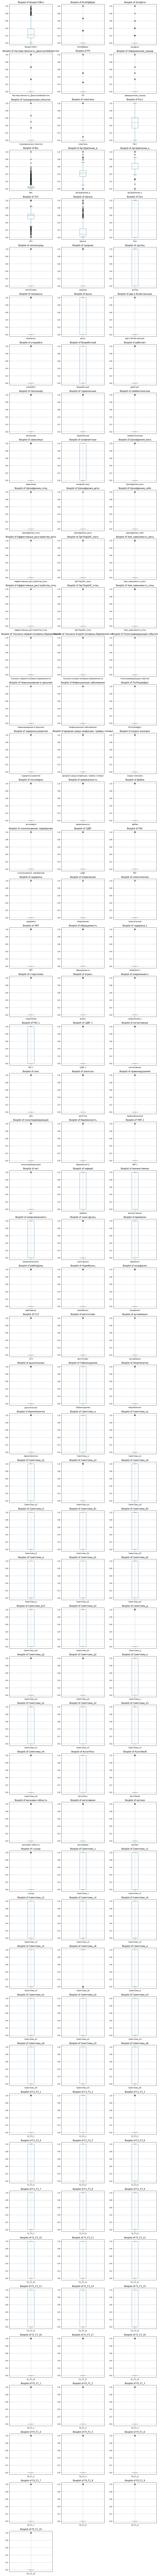

In [18]:
simple_boxplots(pd.concat([X_train_encoded, X_test_encoded]), figsize=(12, 200))
